In [1]:
import pandas as pd
from helpers.idf_helpers import *
from helpers.plot_helpers import *
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from eppy.modeleditor import IDF
from IPython.display import display

import os

para ver como manipular fechas en time series:

https://towardsdatascience.com/basic-time-series-manipulation-with-pandas-4432afee64ea

Estudios:

1. la casita sola
2. la casita con solo con aire acondicionado continuo
3. la casita solo con gente
4. la casita con gente y aire acondicionado continuo
5. la casita con luces gente y aure acondicionado continuo (lo normal)
6. la casita con luces gente y aire acondicionado según ocupación.

Por úlyimo compara 5 y 6

## Primer estudio 
Input: eppyProject/input/simple_room_1_window_1_door.idf

with obj ['PEOPLE', 'LIGHTS', 'ELECTRICEQUIPMENT'] deleted (no lights, people or electricequipment)

Variables: ['Site Outdoor Air Drybulb Temperature','Zone Air Temperature']

python Script: TemperaturaStudy.py

In [2]:
data1 = eso_to_ts('studies/TemperatureStudy1/eplusout.csv')

idffile = 'studies/TemperatureStudy1/idffile.idf'
iddfile = '/usr/local/EnergyPlus-9-4-0/Energy+.idd'
epwfile = '/home/paula/Documentos/Doctorado/Desarrollo/eppyProject/input/Wheather file/FRA_Paris.Orly.071490_IWEC.epw'
idf1 = initialization(idffile, iddfile, epwfile)

In [3]:
@interact
def show_not_null_classes(classes = notnullobj(idf1)):
    return epobject_to_df(idf1.idfobjects[classes])

interactive(children=(Dropdown(description='classes', options=('VERSION', 'SIMULATIONCONTROL', 'BUILDING', 'TI…

## segundo estudio

Input: 'eppyProject/input/simple_room_1_window_1_door_ventilator_constant.idf'.idf

Using HVACTemplate:System:Unitary

Heating_Setpoint_Schedule_Name 	Always On Continuous

with obj ['PEOPLE', 'LIGHTS', 'ELECTRICEQUIPMENT'] deleted (no lights, people or electricequipment)

Variables: ['Site Outdoor Air Drybulb Temperature','Zone Air Temperature']

python Script: TemperaturaStudy2.py


In [4]:
data2 = eso_to_ts('/home/paula/Documentos/Doctorado/Desarrollo/eppyProject/studies/TemperatureStudy2/eplusout.csv')
idffile = 'studies/TemperatureStudy2/idffile.idf'
iddfile = '/usr/local/EnergyPlus-9-4-0/Energy+.idd'
epwfile = '/home/paula/Documentos/Doctorado/Desarrollo/eppyProject/input/Wheather file/FRA_Paris.Orly.071490_IWEC.epw'
idf2 = initialization(idffile, iddfile, epwfile)

In [5]:
@interact
def show_not_null_classes(classes = notnullobj(idf2)):
    return epobject_to_df(idf2.idfobjects[classes])

interactive(children=(Dropdown(description='classes', options=('VERSION', 'SIMULATIONCONTROL', 'BUILDING', 'TI…

<AxesSubplot:xlabel='Date/Time'>

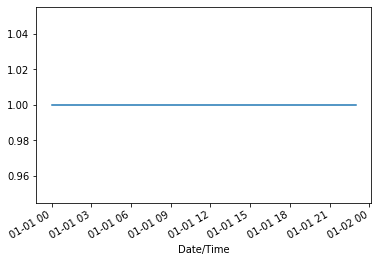

In [6]:
data2['2000-01-01'].iloc[:,2].plot()

## Tercer estudio 
### igual que el primero pero con gente

Input: 'eppyProject/input/simple_room_1_window_1_door.idf'.idf

Using HVACTemplate:System:Unitary

Heating_Setpoint_Schedule_Name Always On Continuous

with obj ['', 'LIGHTS', 'ELECTRICEQUIPMENT'] deleted (no lights, people or electricequipment)

Variables: ['Site Outdoor Air Drybulb Temperature','Zone Air Temperature']

python Script: TemperaturaStudy2.py


In [7]:
data3 = eso_to_ts('studies/TemperatureStudy3/eplusout.csv')

idffile = 'studies/TemperatureStudy3/idffile.idf'
iddfile = '/usr/local/EnergyPlus-9-4-0/Energy+.idd'
epwfile = '/home/paula/Documentos/Doctorado/Desarrollo/eppyProject/input/Wheather file/FRA_Paris.Orly.071490_IWEC.epw'
idf3 = initialization(idffile, iddfile, epwfile)

In [8]:
@interact
def show_not_null_classes(classes = notnullobj(idf3)):
    return epobject_to_df(idf3.idfobjects[classes])

interactive(children=(Dropdown(description='classes', options=('VERSION', 'SIMULATIONCONTROL', 'BUILDING', 'TI…

__TemperatureStudy4__:

- PEOPLE: SÍ
- LIGHTS: NO
- ELECTRICEQUIPMENT: NO
- AIRCONDITIONER: SÍ
  - DATOS:
              key 	HVACTemplate:Thermostat
              Name 	thermostat 1
              Heating_Setpoint_Schedule_Name 	Always On Continuous
              Constant_Heating_Setpoint 	15
              Cooling_Setpoint_Schedule_Name 	
              Constant_Cooling_Setpoint 	25

In [10]:
idffile = '/home/paula/Documentos/Doctorado/Desarrollo/eppyProject/input/simple_room_1_window_1_door_unitary_System_sch_constant.idf'
iddfile = '/usr/local/EnergyPlus-9-4-0/Energy+.idd'
epwfile = '/home/paula/Documentos/Doctorado/Desarrollo/eppyProject/input/Wheather file/FRA_Paris.Orly.071490_IWEC.epw'
idf4 = initialization(idffile,iddfile,epwfile)

In [11]:
@interact
def show_not_null_classes(classes = notnullobj(idf4)):
    return epobject_to_df(idf4.idfobjects[classes])

interactive(children=(Dropdown(description='classes', options=('VERSION', 'SIMULATIONCONTROL', 'BUILDING', 'TI…

In [12]:
data4 = eso_to_ts('studies/TemperatureStudy4/eplusout.csv')

__TemperatureStudy5__:

- PEOPLE: SÍ
- LIGHTS: SÍ
- ELECTRICEQUIPMENT: SÍ
- AIRCONDITIONER: SÍ
  - DATOS:
              key 	HVACTemplate:Thermostat
              Name 	thermostat 1
              Heating_Setpoint_Schedule_Name 	Always On Continuous
              Constant_Heating_Setpoint 	15
              Cooling_Setpoint_Schedule_Name 	
              Constant_Cooling_Setpoint 	25

In [13]:
idffile = '/home/paula/Documentos/Doctorado/Desarrollo/eppyProject/input/simple_room_1_window_1_door_unitary_System_sch_small_office_Activity.idf'
iddfile = '/usr/local/EnergyPlus-9-4-0/Energy+.idd'
epwfile = '/home/paula/Documentos/Doctorado/Desarrollo/eppyProject/input/Wheather file/FRA_Paris.Orly.071490_IWEC.epw'
idf5 = initialization(idffile,iddfile,epwfile)

In [14]:
@interact
def show_not_null_classes(classes = notnullobj(idf5)):
    return epobject_to_df(idf5.idfobjects[classes])

interactive(children=(Dropdown(description='classes', options=('VERSION', 'SIMULATIONCONTROL', 'BUILDING', 'TI…

In [15]:
data5 = eso_to_ts('studies/TemperatureStudy5/eplusout.csv')

In [16]:
idffile = '/home/paula/Documentos/Doctorado/Desarrollo/eppyProject/input/simple_room_1_window_1_door_unitary_System_sch_small_office_Activity.idf'
iddfile = '/usr/local/EnergyPlus-9-4-0/Energy+.idd'
epwfile = '/home/paula/Documentos/Doctorado/Desarrollo/eppyProject/input/Wheather file/FRA_Paris.Orly.071490_IWEC.epw'
idf6 = initialization(idffile,iddfile,epwfile)

In [17]:
@interact
def show_not_null_classes(classes = notnullobj(idf6)):
    return epobject_to_df(idf6.idfobjects[classes])

interactive(children=(Dropdown(description='classes', options=('VERSION', 'SIMULATIONCONTROL', 'BUILDING', 'TI…

In [18]:
data6 = eso_to_ts('studies/TemperatureStudy6/eplusout.csv')

<AxesSubplot:xlabel='Date/Time'>

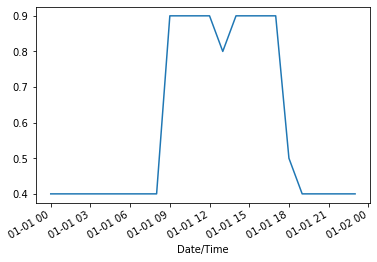

In [19]:
data6['2000-01-01'].iloc[:,2].plot()

In [20]:
winterperiod = ['2000-01-08','2000-01-10']
summerperiod= ['2000-08-08','2000-08-10']
data_env = data1['Environment:Site Outdoor Air Drybulb Temperature [C](Hourly)']

<AxesSubplot:xlabel='Date/Time'>

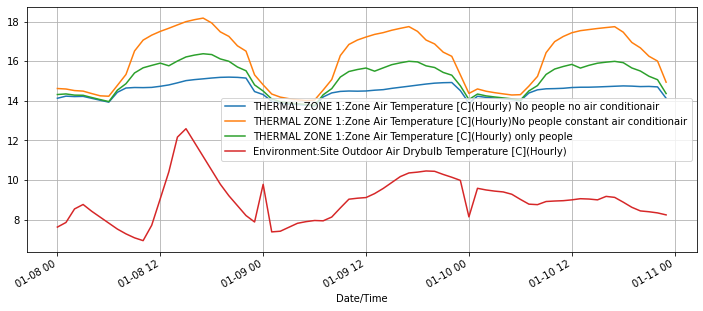

In [36]:
datalist=[data1.iloc[:,1],data2.iloc[:,1],data3.iloc[:,1]]
titles = ['No people no air conditionair','No people constant air conditionair','only people']
wdata1 = merge_transform_ts(p=winterperiod,data_list=datalist,env_data=data_env,titles=titles)
wdata1.plot(figsize = (12,5),grid =True)

<AxesSubplot:xlabel='Date/Time'>

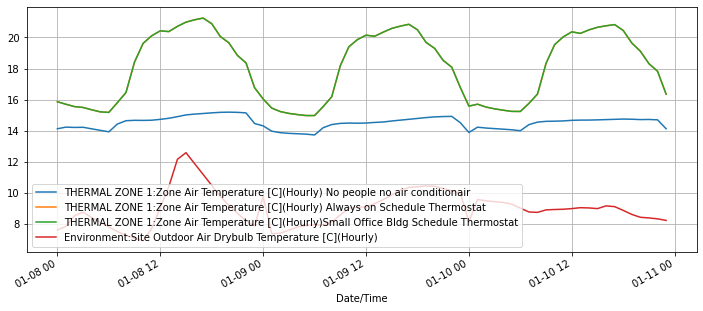

In [37]:
datalist=[data1.iloc[:,1],data5.iloc[:,1],data6.iloc[:,1]]
titles = ['No people no air conditionair','Always on Schedule Thermostat','Small Office Bldg Schedule Thermostat'] # aqyu hay algún fallo entre el data1 y data2 xq no puede ser iguales
wdata2 = merge_transform_ts(p=winterperiod,data_list=datalist,env_data=data_env,titles=titles)
wdata2.plot(figsize = (12,5),grid =True)

## Summer Comparisson 

<AxesSubplot:xlabel='Date/Time'>

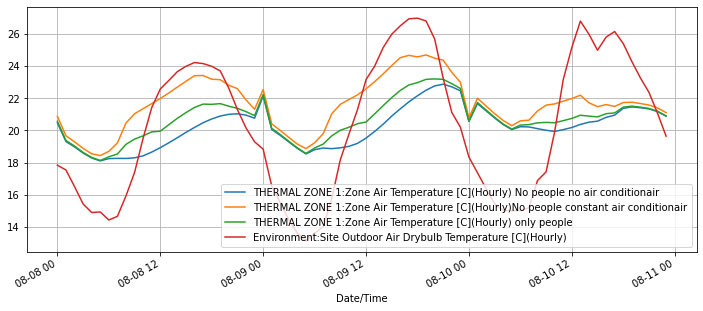

In [41]:
datalist=[data1.iloc[:,1],data2.iloc[:,1],data3.iloc[:,1]]
titles = ['No people no air conditionair','No people constant air conditionair','only people']
sdata = merge_transform_ts(p=summerperiod,data_list=datalist,env_data=data_env,titles=titles)
sdata.plot(figsize = (12,5),grid =True)

<AxesSubplot:xlabel='Date/Time'>

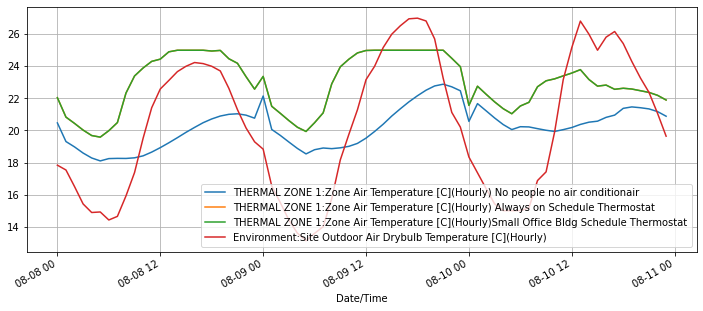

In [40]:
datalist=[data1.iloc[:,1],data5.iloc[:,1],data6.iloc[:,1]]
titles = ['No people no air conditionair','Always on Schedule Thermostat','Small Office Bldg Schedule Thermostat']
sdata = merge_transform_ts(p=summerperiod,data_list=datalist,env_data=data_env,titles=titles)
sdata.plot(figsize = (12,5),grid =True)